## This Notebook - Goals - FOR EDINA

**What?:**
- K-means visualisations of generated data
- Interactive
- Discussion of issues with k-means

**Who?:**
- intro to ML course (3rd year computer science UG)
- PG students in social sciences learning ML

**Why?:**
- Common topic, high potential for interesting visuals.
- Mandatory subject for many universities
- Used in many fields $\rightarrow$ applicable to PG in other fields

**Noteable features to exploit:**
- Visualisation
- Interactive / animation libraries,
- Tutorial format
- Embedded latex

**How? Tools/methods used:**
- Bokeh - interactive visualisation
- embedded latex

<hr>

<div class="alert alert-info">

# Personal notes/references TO DELETE

To do:
- knee visualisation
- more visualisation
- minimise redundancy
- banner across top
- add titles "raw data"...
- the colour palette

References: 

[nice book on ML - chapter 8](https://ipython-books.github.io/chapter-8-machine-learning/)

[this tutorial on kmeans](https://nbviewer.jupyter.org/github/temporaer/tutorial_ml_gkbionics/blob/master/2%20-%20KMeans.ipynb)

[textbook tutorial](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.11-K-Means.ipynb)

[IAML week 7 tutorial](https://github.com/psambit9791/IAML2019-Students/blob/master/StudyGuides/IAML_DL_StudyGuide_Week07.pdf)

[explanation of theory, image compression with k-means](https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a)

</div>

# K-means clustering

K-means is a simple and common clustering algorithm. 

It is unsupervised, meaning that labels are not used to train the model on "known" data. Instead, the algorithm uses the properties of the data points (*samples*) to group each point into clusters.

### Uses of K-means

K-means is used to cluser data that does not have explicit labels. This can help give an intuition about what is going on within the data.

K-means is additionally used as a dimension reduction technique, whereby the clustering given by the algorithm is used to represent data in further processing.

### Goal - What is a successful clustering?

K-means is a polythetic method, meaning that it aims to group points that are similar to one another. The alternative to this is monothetic methods, which cluster groups based on some common property such as age.

K-means assumes that a good cluster has the following properties:
- The centre of the cluster *(centroid)* is the mean average of the points in that cluster.
- Each point in the cluster is closer to that cluster's centroid than any other cluster's centroid.

Based on this idea of success, the goal is to minimise the aggregate intra-cluster distance. This objective function takes the following form: sum the distances between each point, $x_i$ and it's assigned cluster centre, $c_j$:

$$
J = \sum_{j=1}^{K} \sum_{i=1}^{N} ‖ \mathbf{x}_i^{(j)} - {\mu}_j ‖^2
$$

Where:
- $K_j$ is the jth cluster,
- ${x}_i$ is the $i$'th data point in the set, and 
- ${\mu}_j$ is the centroid of cluster $j$

### Algorithm - How does it work?

K-means input:
- N instances of d-dimensional data
- K - the number of populations that are to be extracted from the data.

Whilst there is scope to use alternative distance measures, Euclidean distance will be used in this tutorial.

<b>K-means general approach:</b>
- Initialise K centroids randomly
- Iterate the following until convergence (no change in centroids):
    - For each data point, $x_i$ in data set, compute distance to every centroid. Assign point to cluster with nearest centroid.
    - Compute new centroids, $c_j$ by taking a mean average of all points now in that cluster.
    
Once the centroids stop changing, the objective function (above) can be calculated.
    
<i><b>Note:</b> Notice that the cluster centres are initialised <b>randomly</b>. This means that running the algorithm with a different random state will yield different results. For this reason, this tutorial sets the random state to 0 each time K-means is fit, which means the results will not change each time the notebook is run. If using k-means in practise, it is almost always necessary to run the algorithm a few times with different random states in order to attain a comprehensive picture of results.</i>

<hr>

### Importing useful libraries

The following cell loads some useful python code to use later. These are all pre-installed on Noteable, so they just need to be loaded into the notebook.

In [1]:
## Imports
import numpy as np              # alias useful array methods
import sklearn                  # scipy machine learning library
import sklearn.datasets as ds   # data sets
import sklearn.cluster as cl    # alias cluster methods
import matplotlib.pyplot as plt # alias plotting functions
# magic iPython function
%matplotlib inline    

from skimage import io

from bokeh.plotting import figure, show # visualisation library
from bokeh.io import output_notebook    # print to notebook
import bokeh

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

<hr>

### Data

To show the results of the algorithm, some data is needed for practise! [Scikit-learn]() provides some useful functions for generating pretend data.

The function provides data (here stored in variable X) and labels (stored in variable y). The labels won't be used to assign clusters, but will come in handy later when the model performance is assessed. A random state is used for reproducibility.

The data generated will be 2D, with 1000 data points in 4 "blobs".

In [2]:
# generate pretend "blob" data
X, y = ds.make_blobs(n_samples=1000, centers=4, 
                          cluster_std=0.7, random_state=0)

Plot the generated data with rainbow colours using [bokeh]() functions! These functions also allow you to play with the graph produced! You can drag the graph about, zoom in and out and more.

In [3]:
# plot generated data using bokeh

# tell bokeh to plot to the notebook
output_notebook()

# define some colours for rainbow plot
# define rainbow colours
xcols = np.random.random(size=1000) * 500
ycols = np.random.random(size=1000) * 500
colors = [
    "#%02x%02x%02x" % (int(r), int(g), 150) for r, g in 
    zip(xcols, ycols)
]

# specify figure
p = figure( plot_width=450, plot_height=350)
p.circle(X[:,0], X[:,1], radius=0.05, fill_color=colors, 
         fill_alpha=0.8, line_color=None)
p.title.text = "Raw blobs data"
p.title.align = "center"
p.title.text_color = "purple"
p.title.text_font_size = "25px"

# plot in notebook (interactive)
show(p)

Loading BokehJS ...

<hr>

## Run K-Means

Time to put k-means to the test, and see if the algorithm can also pick out the groups of data.

K-means requires the K value as input, so the number of clusters desired needs to be selected up front. Here, it is sensible to pick K=4 since it is clear from the data above that the points fall into 4 clusters.

The next cell uses scikit-learn's KMeans clustering algorithm to sort the data into 4 clusters, then prints out the resulting clusters. The larger black hexagons on the graph are the cluster centroids for each cluster.

In [4]:
# create model - note we PICK k=4
kmeans = cl.KMeans(4, random_state=0)
# fit model to data, store labels in variable Y
kmeans.fit(X)
Y = kmeans.labels_.astype(np.int) # (1000,) ndarray
mu = kmeans.cluster_centers_ #store cluster centroids

# specify colours for clusters
four_colors = np.array([x for x in ('#c22980', 
                               '#6d48d8', '#fabb1b', '#0ff')])
#colors = np.hstack([colors])

# specify figure
p = figure(plot_width=400, plot_height=300)
# plots different colors for different clusters
p.circle(X[:,0], X[:,1], radius=0.05, 
         color=four_colors[Y].tolist(), fill_alpha=0.5, 
         line_color=None)
# Plot centroids of clusters as black hexagons
p.hex(mu[:,0], mu[:,1], size=7, color="black")
# plot in notebook (interactive)
show(p)

Looks like k-means did a reasonable job! Whilst a graph is useful for this example, it can sometimes be important to gather other performance statistics such as accuracy:

In [5]:

def acc(y,y_pred):
    correct = np.sum(y == y_pred)
    incorrect = np.sum(y != y_pred)
    accuracy = correct / (correct+incorrect)
    print("Accuracy is: " + str(accuracy*100) + "%")

In [6]:
acc(y,Y)

Accuracy is: 49.6%


That is actually terrible. Why? Check which ones have been misclassified:

In [7]:
correct_vector = 1*(y == Y)

In [8]:
# specify colours for clusters
colors2 = np.array([x for x in ('red', 'green')])

# specify figure
p = figure(plot_width=400, plot_height=300)
# plots different colors for different clusters
p.circle(X[:,0], X[:,1], radius=0.05, 
         color=colors2[correct_vector].tolist(), fill_alpha=0.5, 
         line_color=None)

# Plot centroids of clusters as black hexagons
p.hex(mu[:,0], mu[:,1], size=7, color="black")
# plot in notebook (interactive)
show(p)

right because the number labels are just different - solvable problem. so the algorithm called cluser three cluster one or some similar mix up. This is ok. Using the same colour palette as before, print the actual true labels as colours:

In [9]:
# specify colours for clusters
colors = np.array([x for x in ('#c22980', 
                               '#6d48d8', '#fabb1b', '#0ff')])
#colors = np.hstack([colors])

# specify figure for true labels
left = figure(plot_width=250, plot_height=250)
# plot with colours of true data
left.circle(X[:,0], X[:,1], radius=0.05, 
         color=colors[y].tolist(), fill_alpha=0.5, 
         line_color=None)

right = figure(plot_width=250, plot_height=250)
# plot with colours of predicted data
right.circle(X[:,0], X[:,1], radius=0.05, 
         color=colors[Y].tolist(), fill_alpha=0.5, 
         line_color=None)

# plot in notebook (interactive)
p = bokeh.layouts.gridplot([[left,right]])
show(p)

The colour palette used for the labels is:

'#c22980', '#6d48d8', '#fabb1b', '#0ff'

These are HTML colour codes for the colours on the plot. In order:

<p style="color:#c22980">#c22980 looks pink, assigned label 0</p>
<p style="color:#6d48d8">#6d48d8 looks purple, assigned label 1</p>
<p style="color:#fabb1b">#fabb1b looks yellow, assigned label 2</p>
<p style="color:#0ff">#0ff looks blue, assigned label 3</p>

In the graphs above, the label assignments can therefore be deduced as follows (from top to bottom):

| cluster in image | true label | predicted label |
|------------------|------------|-----------------|
| top              | blue=3     | pink=0          |
| second           | pink=0     | blue=3          |
| third            | yellow=2   | yellow=2        |
| bottom           | purple=1   | purple=1        |

relabel predicted label data by swapping 0 and 3:

In [10]:
new_pred = np.copy(Y)
where_0s = np.where(new_pred==0)
where_3s = np.where(new_pred==3)
new_pred[where_0s] = 3
new_pred[where_3s] = 0
# print first few to check as expected
print(Y[:10])
print(new_pred[:10])

[0 3 0 2 1 3 3 1 3 3]
[3 0 3 2 1 0 0 1 0 0]


In [11]:
# specify figure for true labels
left = figure(plot_width=250, plot_height=250)
# plot with colours of true data
left.circle(X[:,0], X[:,1], radius=0.05, 
         color=colors[y].tolist(), fill_alpha=0.5, 
         line_color=None)

right = figure(plot_width=250, plot_height=250)
# plot with colours of predicted data
right.circle(X[:,0], X[:,1], radius=0.05, 
         color=colors[new_pred].tolist(), fill_alpha=0.5, 
         line_color=None)

# plot in notebook (interactive)
p = bokeh.layouts.gridplot([[left,right]])
show(p)

In [12]:
acc(y,new_pred)

Accuracy is: 99.1%


FIXED

## Limitations of k-means

Like all clustering algorithms, k-means handles some issues more effectively than others. In the above example, the algorithm is used on data that clearly separates out into groups. But in data that isn't linearly seperable, it can misclassify:

In [13]:
moon_data, moon_true = ds.make_moons(n_samples=200, noise=0.03, 
                                     random_state=0)

In [14]:
# plot generated data using bokeh

# tell bokeh to plot to the notebook
output_notebook()

# define some colours for rainbow plot
# define rainbow colours
xcols = np.random.random(size=200) * 500
ycols = np.random.random(size=200) * 500
colors = [
    "#%02x%02x%02x" % (int(r), int(g), 150) for r, g in 
    zip(xcols, ycols)
]

# specify figure
p = figure(plot_width=450, plot_height=350)
p.circle(moon_data[:,0], moon_data[:,1], 
         radius=0.025, fill_color=colors, 
         fill_alpha=0.8, line_color=None)

# plot in notebook (interactive)
show(p)

Loading BokehJS ...

In [15]:
# create model - note we PICK k=4
kmeans = cl.KMeans(2, random_state=0)
# fit model to data, store labels in variable Y
kmeans.fit(moon_data)
Y = kmeans.labels_.astype(np.int) # (1000,) ndarray
mu = kmeans.cluster_centers_ #store cluster centroids

# specify colours for clusters
colors = np.array([x for x in ('#c22980', 
                               '#6d48d8')])
#colors = np.hstack([colors])

# specify figure
p = figure(plot_width=450, plot_height=350)
# plots different colors for different clusters
p.circle(moon_data[:,0], moon_data[:,1], radius=0.025, 
         color=colors[Y].tolist(), fill_alpha=0.5, 
         line_color=None)
# Plot centroids of clusters as black hexagons
p.hex(mu[:,0], mu[:,1], size=7, color="black")
# plot in notebook (interactive)
show(p)

## The problem of picking k

In the cluster example in this notebook, it was fairly obvious that 4 clusters were present in the data. In real life examples, this is rarely the case. 

Additionally since the objective function will improve the closer the value to k (imagine the case where K is the number of samples, the distance from each point to its centroid would be 0, since each point would be the same as it's centroid. But of course n is massive, and will just give clusters that are themselves the data set!

So what is the best number of clusters to find in a data set? As a ballpark figure for basic exercises, 5 is often a good sort of number. But we can do better. One way of finding a good first try figure is to use a scree plot.

The following code shows the scree plot for k values of 1-10. The y axis shows the objective function value for each of these k values when applied to the initial blobs data.

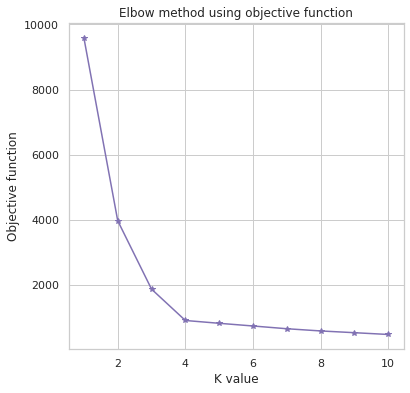

In [16]:
# Run the Kmeans algorithm and get the index of data points clusters
sse = []
Ks = range(1, 11)

for k in Ks:
    km = cl.KMeans(n_clusters=k, random_state=0).fit(X)
    # inertia is the sum squared distance 
    # from each point to it's assigned cluster
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(Ks, sse, '-m*')
plt.xlabel('K value')
plt.ylabel('Objective function')
plt.title("Elbow method using objective function")
plt.show()

As shown in the graph above, there is a sort of "elbow" at K=4. The objective function (which we want to minimise) does not improve much beyond K=5 (the graph flattens).